# Linear Classification in Scikit-Learn

Below are two linear classification models used in scikit learn trained and tested on simplified antarctic penguin data taken from the following source: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data


The two linear classification models used are logistic regression and SVC's (support vector classifiers).

# Imports

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# a) Loading data

In [3]:
df = pd.read_csv("penguin-sizes.csv")
df = df.dropna()
df = df.drop(columns = df.columns[[1, 6]], axis=1)
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [4]:
X = df[df.columns[[1,2,3,4]]].to_numpy()
y = df[df.columns[0]].to_numpy()

print('X shape: ', X.shape, '\n') # 334 samples, 4 features
print('Feature names: ', df.columns[1], ' ', df.columns[2], ' ',
      df.columns[3], ' ', df.columns[4], ' ', '\n')
print('Feature values of first sample: ', X[0,:], '\n')
print('y shape: ', y.shape,'\n')
print('Target names: ', df.columns[0], '\n')
print('Target values (penguin species): ', np.unique(y))

X shape:  (334, 4) 

Feature names:  culmen_length_mm   culmen_depth_mm   flipper_length_mm   body_mass_g   

Feature values of first sample:  [  39.1   18.7  181.  3750. ] 

y shape:  (334,) 

Target names:  species 

Target values (penguin species):  ['Adelie' 'Chinstrap' 'Gentoo']


In [5]:
# Converting target strings to numerical values
y = np.reshape(y,(-1,1))
y_enc = OrdinalEncoder().fit_transform(y).ravel()
#print("Encoded target values: ", y_enc)

def count_freq(arr, n):
    count = 0
    for i in arr:
        if i == n:
            count += 1
    return count

num_0 = count_freq(y_enc, 0)
num_1 = count_freq(y_enc, 1)
num_2 = count_freq(y_enc, 2)

print("Number of Adelie penguin samples: ", num_0)
print("Number of Chainstrap penguin samples: ", num_1)
print("Number of Gentoo penguin samples: ", num_2)
print("Total samples: ", num_0 + num_1 + num_2)

Number of Adelie penguin samples:  146
Number of Chainstrap penguin samples:  68
Number of Gentoo penguin samples:  120
Total samples:  334


# b) Scatter plot

Text(0, 0.5, 'Culmen Depth (mm)')

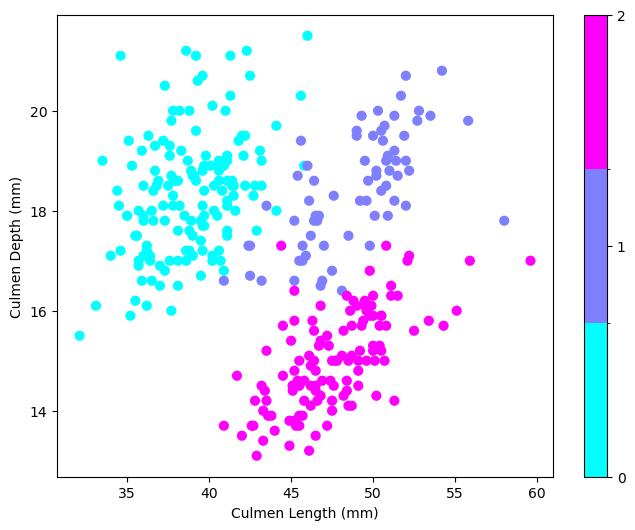

In [66]:
fig, ax = plt.subplots(figsize=(8,6))

# Discretize the colormap to represent 3 classes
cmap = cm.cool
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Penguin classes', cmaplist, cmap.N)
bounds = np.linspace(0, 2, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plot
s = ax.scatter(X[:,0],X[:,1], s=40, cmap=cmap, norm=norm, c=y_enc)
fig.colorbar(s, ticks=[0, 1, 2])

ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')

# c) Histograms

In [7]:
def label_array(X, y, n): # Function to create array of sample values of a specified feature for each class
    X_num = []
    for i in range(len(X)):
        if int(y[i]) == n:
            X_num.append(X[i])
    X_num = np.array(X_num)
    return X_num
        
# Create array of culmen length values for each class
X0_0 = label_array(X[:,0], y_enc, 0)
X0_1 = label_array(X[:,0], y_enc, 1)
X0_2 = label_array(X[:,0], y_enc, 2)

# Create array of culmen depth values for each class
X1_0 = label_array(X[:,1], y_enc, 0)
X1_1 = label_array(X[:,1], y_enc, 1)
X1_2 = label_array(X[:,1], y_enc, 2)

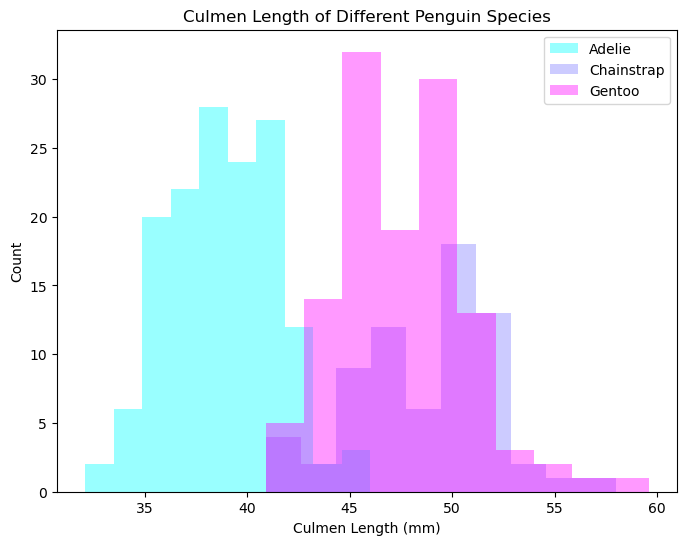

In [68]:
# Culmen Length
fig, ax = plt.subplots(figsize=(8,6))

alpha = 0.4
cmap = mpl.colormaps['cool']

ax.hist(X0_0, label="Adelie", alpha=alpha, color=cmap(0.0))
ax.hist(X0_1, label="Chainstrap", alpha=alpha, color=cmap(0.5))
ax.hist(X0_2, label="Gentoo", alpha=alpha, color=cmap(1.0))

plt.legend(loc='upper right') 
plt.title("Culmen Length of Different Penguin Species")
ax.set_xlabel("Culmen Length (mm)")
ax.set_ylabel("Count")
plt.show()

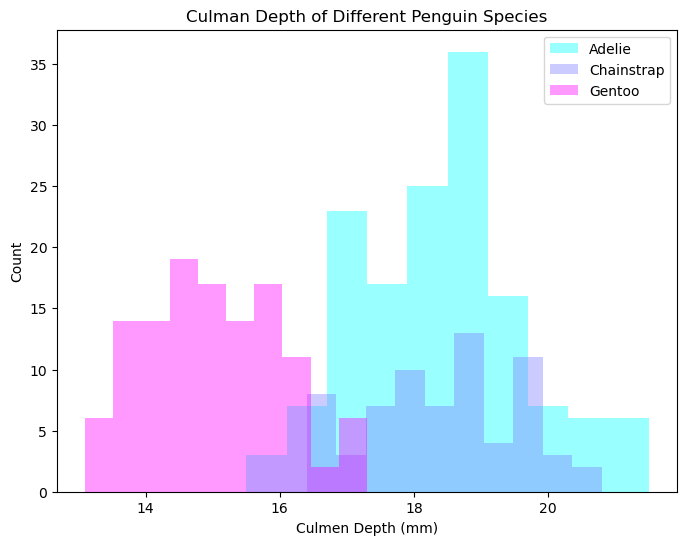

In [69]:
# Culmen Depth
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(X1_0, label="Adelie", alpha=alpha, color=cmap(0.0))
ax.hist(X1_1, label="Chainstrap", alpha=alpha, color=cmap(0.5))
ax.hist(X1_2, label="Gentoo", alpha=alpha, color=cmap(1.0))

plt.legend(loc='upper right') 
plt.title("Culman Depth of Different Penguin Species")
ax.set_xlabel("Culmen Depth (mm)")
ax.set_ylabel("Count")
plt.show()

# d) Train/test split

In [70]:
from sklearn.model_selection import train_test_split

# train_test_split(*arrays, test_size=None, train_size=None,random_state=None, shuffle=True, stratify=None)
# Note: test_size and train_size is between 0.0 to 1.0.
# If None is specified, test_size = 0.25 and train_size = 1- test_size = 0.75

X_train, X_test, y_train, y_test = train_test_split (X, y_enc, random_state=1, shuffle=True)

print("X training data: ", X_train.shape, "\n", "X test data: ", X_test.shape,"\n")
print("y training data: ", y_train.shape, "\n", "y test data: ", y_test.shape)

X training data:  (250, 4) 
 X test data:  (84, 4) 

y training data:  (250,) 
 y test data:  (84,)


# e) Training models

In [59]:
# sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
            # intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, 
            # multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
            #tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
            #break_ties=False, random_state=None)[source]

C = np.logspace(-2, 2, 5) # Regularization parameter from 10e-2 to 10e2

# Logistic regression
logreg_scores = []
for i in C:
    logreg_scores.append(LogisticRegression(penalty='l1', solver='saga', C=i, max_iter=10000, random_state=1)
                         .fit(X_train, y_train).score(X_test, y_test))

# Support vector classifier
SVC_scores = []
for i in C:
    SVC_scores.append(LinearSVC(C=i, max_iter=10000, random_state=1, dual=True)
                      .fit(X_train, y_train).score(X_test, y_test))

# Note: the SVM model never converges for any maximum iteration value
print("Logistic regression scores: ", logreg_scores)
print("Linear SVM scores ", SVC_scores)

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic regression scores:  [0.6904761904761905, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857]
Linear SVM scores  [0.8690476190476191, 0.9523809523809523, 0.7738095238095238, 0.7738095238095238, 0.7738095238095238]


/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [60]:
best_logreg = np.argmax(logreg_scores)
best_logreg_C = C[best_logreg]

best_SVC = np.argmax(SVC_scores)
best_SVC_C = C[best_SVC]

print("Best C for logistic regression: ", best_logreg_C)
print("Best C for SVC: ", best_SVC_C)

Best C for logistic regression:  0.1
Best C for SVC:  0.1


In [65]:
logreg = LogisticRegression(penalty='l1', solver='saga', C=best_logreg_C, max_iter=10000, random_state=1).fit(X_train, y_train)
SVC = LinearSVC(C=best_SVC_C, max_iter=10000, random_state=1, dual=True).fit(X_train, y_train)

y_logreg_pred = logreg.predict(X_test)
y_SVC_pred = SVC.predict(X_test)

logreg_conf = confusion_matrix(y_test, y_logreg_pred)
SVC_conf = confusion_matrix(y_test, y_SVC_pred)

average = None
logreg_f1 = f1_score(y_test, y_logreg_pred, average=average)
SVC_f1 = f1_score(y_test, y_SVC_pred, average=average)

print("Logistic regression confusion matrix: ", "\n", logreg_conf, "\n")
print("SVC confusion matrix: ", "\n", SVC_conf, "\n")
print("Logistic regression f1 score: ", "\n", logreg_f1, "\n")
print("SVC f1 score: ", "\n", SVC_f1, "\n")

Logistic regression confusion matrix:  
 [[30  0  5]
 [ 6 12  3]
 [ 4  0 24]] 

SVC confusion matrix:  
 [[34  0  1]
 [ 1 19  1]
 [ 1  0 27]] 

Logistic regression f1 score:  
 [0.8        0.72727273 0.8       ] 

SVC f1 score:  
 [0.95774648 0.95       0.94736842] 



/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
